Numerical Gradient Checking

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
%matplotlib inline

148.4131591025766


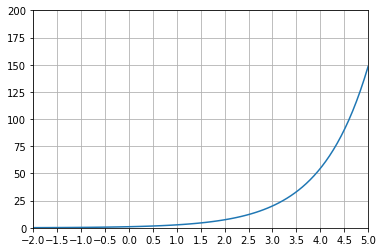

In [2]:
x = np.linspace(-3,5,100)
print(np.exp(x[-1]))

fig, ax = plt.subplots() 
ax.set_xticks(np.linspace(-2, 5, 15))
ax.set_xlim(-2, 5)
ax.set_ylim(0, 200)
ax.grid()

ax.plot(x, np.exp(x))

plt.show()

In [3]:
import copy
from common import (
    softmax,
    cross_entropy_log_loss,
    OFFSET_FOR_DELTA,
    OFFSET_FOR_LOG
)
import pandas as pd

In [4]:
def gn(A, T):
    h = OFFSET_FOR_DELTA
    _A = copy.deepcopy(A)
    _A[
        ::,
        0
    ] += h
    J1 = cross_entropy_log_loss(softmax(_A), T)
    del _A
    _A = copy.deepcopy(A)
    _A[
        ::,
        0
    ] -= h
    J2 = cross_entropy_log_loss(softmax(_A), T)
    return (J1 - J2) / (2 * h)

In [5]:
# A1 is constant 1, increase A0 from 0 to 1 so that the p0 increase from 0 to 0.5 
N = 20+1
A0 = np.linspace(0, 1, N)
A1 = np.array([1] * N)
A = np.c_[A0, A1]
P = softmax(A)
T = np.array([0] * N)
L = cross_entropy_log_loss(P, T)
G = gn(A, T)
AG = P[
    ::,
    0
]
X = np.c_[A, P, L, G, AG]

headers = ['a0', 'a1', 'p0','p1','L', 'G', 'AG']
df = pd.DataFrame(X, columns=headers)
df

,a0,a1,p0,p1,L,G,AG
0,0.00,1.0,0.268941,0.731059,1.313258,-0.731056,0.268941
1,0.05,1.0,0.278885,0.721115,1.276952,-0.721112,0.278885
2,0.10,1.0,0.289050,0.710950,1.241150,-0.710947,0.289050
3,0.15,1.0,0.299433,0.700567,1.205861,-0.700565,0.299433
4,0.20,1.0,0.310026,0.689974,1.171097,-0.689972,0.310026
5,0.25,1.0,0.320821,0.679179,1.136868,-0.679176,0.320821
6,0.30,1.0,0.331812,0.668188,1.103183,-0.668186,0.331812
7,0.35,1.0,0.342990,0.657010,1.070052,-0.657008,0.342990
8,0.40,1.0,0.354344,0.645656,1.037485,-0.645654,0.354344
9,0.45,1.0,0.365864,0.634136,1.005489,-0.634134,0.365864


In [6]:
# A1 is constant 1, increase A0 from 0 to 1 so that the p0 increase from 0 to 0.5 
N = 20+1
A0 = np.linspace(0, 1, N)
A1 = np.array([1] * N)
A = np.c_[A0, A1]
P = softmax(A)
T = np.array([0] * N)
L = cross_entropy_log_loss(P, T)
G = gn(A, T)
AG = P[
    ::,
    0
]
X = np.c_[A, P, L, G, AG]

headers = ['a0', 'a1', 'p0','p1','L', 'G', 'AG']
df = pd.DataFrame(X, columns=headers)
df

,a0,a1,p0,p1,L,G,AG
0,0.00,1.0,0.268941,0.731059,1.313258,-0.731056,0.268941
1,0.05,1.0,0.278885,0.721115,1.276952,-0.721112,0.278885
2,0.10,1.0,0.289050,0.710950,1.241150,-0.710947,0.289050
3,0.15,1.0,0.299433,0.700567,1.205861,-0.700565,0.299433
4,0.20,1.0,0.310026,0.689974,1.171097,-0.689972,0.310026
5,0.25,1.0,0.320821,0.679179,1.136868,-0.679176,0.320821
6,0.30,1.0,0.331812,0.668188,1.103183,-0.668186,0.331812
7,0.35,1.0,0.342990,0.657010,1.070052,-0.657008,0.342990
8,0.40,1.0,0.354344,0.645656,1.037485,-0.645654,0.354344
9,0.45,1.0,0.365864,0.634136,1.005489,-0.634134,0.365864
